# Wczytywanie bibliotek oraz wczytywanie danych

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import tree

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

/opt/conda/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [37]:
data = pd.read_csv("data.csv")
data.drop(columns="Unnamed: 0", inplace=True)

### Eksploracja danych

In [4]:
data.shape # 24 zmiennych, blsiko 130k obserwacji

(129880, 24)

In [5]:
data.head(10)

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,...,2,2,2,2,4,2,4,0,20.0,satisfied
5,39177,Male,Loyal Customer,16,Business travel,Eco,311,3,3,3,...,5,4,3,1,1,2,5,0,0.0,satisfied
6,79433,Female,Loyal Customer,77,Business travel,Business,3987,5,5,5,...,5,5,5,5,4,5,3,0,0.0,satisfied
7,97286,Female,Loyal Customer,43,Business travel,Business,2556,2,2,2,...,4,4,4,4,5,4,3,77,65.0,satisfied
8,27508,Male,Loyal Customer,47,Business travel,Eco,556,5,2,2,...,5,2,2,5,3,3,5,1,0.0,satisfied
9,62482,Female,Loyal Customer,46,Business travel,Business,1744,2,2,2,...,4,4,4,4,5,4,4,28,14.0,satisfied


In [6]:
data.nunique()

id                                   129880
Gender                                    2
Customer Type                             2
Age                                      75
Type of Travel                            2
Class                                     3
Flight Distance                        3821
Inflight wifi service                     6
Departure/Arrival time convenient         6
Ease of Online booking                    6
Gate location                             6
Food and drink                            6
Online boarding                           6
Seat comfort                              6
Inflight entertainment                    6
On-board service                          6
Leg room service                          6
Baggage handling                          5
Checkin service                           6
Inflight service                          6
Cleanliness                               6
Departure Delay in Minutes              466
Arrival Delay in Minutes        

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 129880 non-null  int64  
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Inflight wifi service              129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Ease of Online booking             129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Food and drink                     1298

In [8]:
data.isnull().sum()

id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
satisfaction                           0
dtype: int64

[Text(0.5, 1.0, 'Count of gender')]

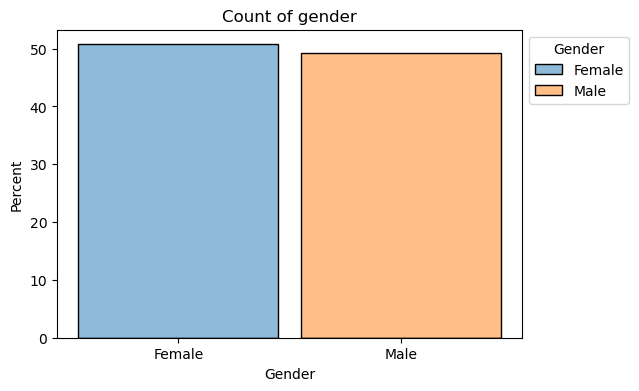

In [24]:
# Udział % płci wśród Wszystkich pasażerów
plt.figure(figsize= (6,4))
chart = sns.histplot(data = data, x='Gender', hue='Gender', stat="percent", shrink=.9)
sns.move_legend(chart, "upper left", bbox_to_anchor=(1, 1))
chart.set(title='Count of Gender')

[Text(0.5, 0, 'Satisfaction'), Text(0.5, 1.0, 'Count of Satisfaction')]

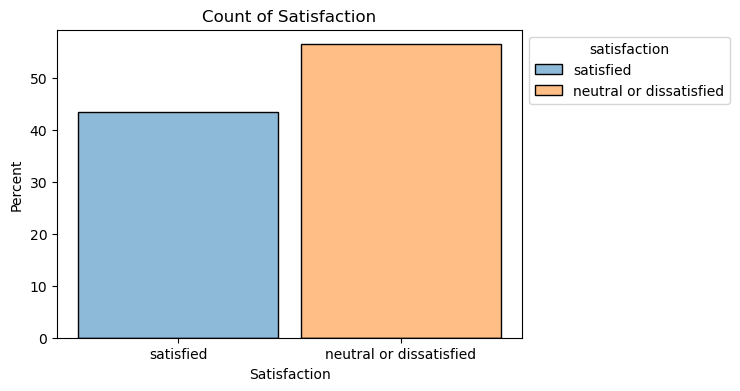

In [26]:
# Udzial % WSZYSTKICH Zadowolonych i niezadowolonych klientów
plt.figure(figsize=(6,4))
chart = sns.histplot(data = data, x='satisfaction', hue='satisfaction', stat='percent', shrink=.9)
sns.move_legend(chart, "upper left", bbox_to_anchor=(1,1))
chart.set(xlabel='Satisfaction', title= 'Count of Satisfaction')

[Text(0, 0.5, 'Count'), Text(0.5, 1.0, 'Count of Satisfaction by Gender')]

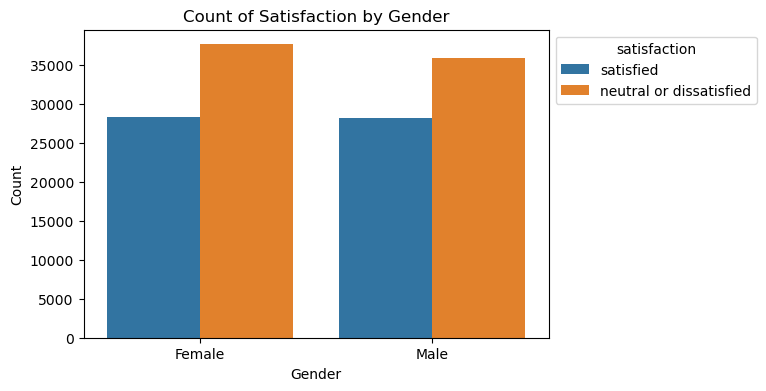

In [28]:
# Ilość zadowolonych i niezadowolonych klientów ze względu na płeć
plt.figure(figsize=(6,4))
chart = sns.countplot(data=data, x='Gender', hue='satisfaction')
sns.move_legend(chart, "upper left", bbox_to_anchor=(1,1))
chart.set(ylabel='Count', title='Count of Satisfaction by Gender')

[Text(0.5, 1.0, 'Distribution of Age')]

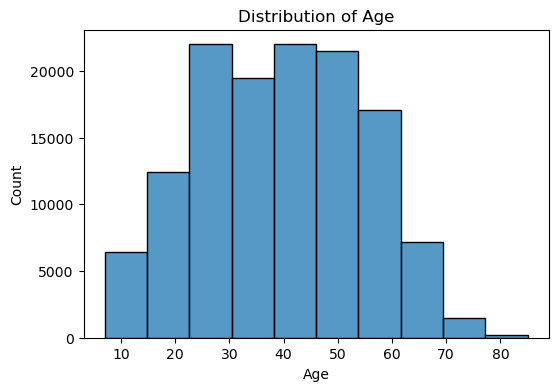

In [31]:
#Rozkład pasażerów ze względu na wiek
plt.figure(figsize=(6,4))
chart=sns.histplot(data=data, x="Age", bins=10) 
chart.set(title='Distribution of Age')

[Text(0, 0.5, 'Count'), Text(0.5, 1.0, 'Count of Traveler Class')]

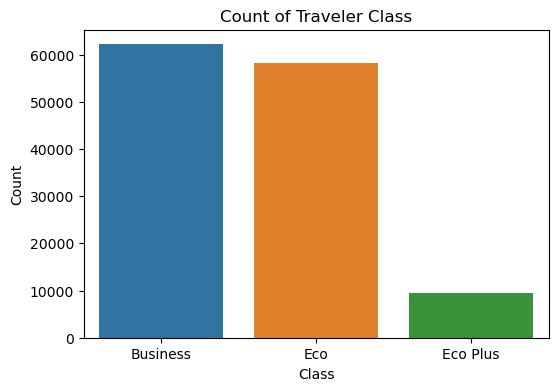

In [43]:
plt.figure(figsize=(6,4))
chart = sns.countplot(data=data, x='Class', order=data['Class'].value_counts().index)
chart.set(ylabel= 'Count', title='Count of Traveler Class')

[Text(0.5, 1.0, 'Distribution of Age by Gender and Travel Class')]

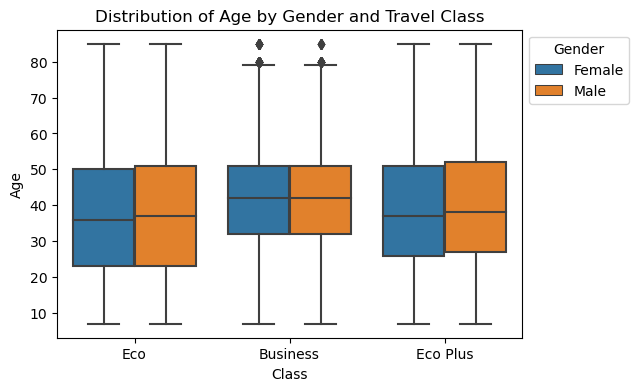

In [49]:
plt.figure(figsize=(6,4))
chart = sns.boxplot(data=data, x='Class', y='Age', hue='Gender')
sns.move_legend(chart, "upper left", bbox_to_anchor=(1,1))
chart.set(title='Distribution of Age by Gender and Travel Class')

[Text(0.5, 1.0, 'Percentage of Customer Type')]

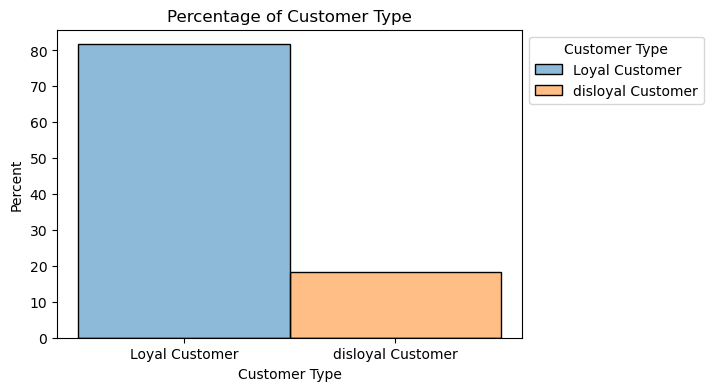

In [55]:
plt.figure(figsize=(6,4))
chart = sns.histplot(data=data, x= 'Customer Type', hue='Customer Type', stat='percent')
sns.move_legend(chart, "upper left", bbox_to_anchor=(1,1))
chart.set(title='Percentage of Customer Type')